In [1]:
%load_ext autoreload
%autoreload complete

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib_inline.backend_inline import set_matplotlib_formats
from tqdm.notebook import tqdm

from src.cache import cache

set_matplotlib_formats("svg")

KeyboardInterrupt: 

In [ ]:
from src.models.instrumental_variable import get_covariances

get_covariances(instruments="weather_")

,cov_w,cov_y,wald
weather_tmin_lag0,0.007196,1.437092,199.720209
weather_tavg_lag0,0.005054,0.704902,139.470942
weather_wspd_lag0,-0.004958,-3.070888,619.349576
weather_snow_lag0,-0.004021,-1.402912,348.855555
weather_wpgt_lag0,-0.003673,-2.693028,733.291212
weather_tmax_lag0,0.003398,0.338210,99.541317
weather_pres_lag0,-0.002069,0.135895,-65.695334
weather_prcp_lag0,0.001804,0.597928,331.519550
weather_tsun_lag0,0.000025,-1.303563,-53063.364734


In [ ]:
get_covariances(instruments="covid_")

,cov_w,cov_y,wald
covid_residential_lag0,-0.011946,-5.288614,442.699405
covid_workplaces_lag0,0.011312,5.479954,484.453797
covid_transit_stations_lag0,0.008937,5.523860,618.081561
covid_retail_and_recreation_lag0,0.008931,5.114593,572.648853
covid_parks_lag0,0.006399,1.881592,294.067165
covid_stringency_index_lag0,-0.004234,-4.918578,1161.640625
covid_grocery_and_pharmacy_lag0,0.003427,5.588776,1630.628751


In [2]:
from src.models.instrumental_variable import get_coefficients

get_coefficients("weather")[0]

single               combi          
                       coef      pval      coef      pval
weather_tavg_lag0  0.005456  0.007429  0.001477  0.958969
weather_tmax_lag0  0.005367  0.008700 -0.005893  0.763434
weather_tmin_lag0  0.005277  0.009424  0.006999  0.603427
weather_wspd_lag0 -0.004673  0.022229 -0.008670  0.073457
weather_tsun_lag0  0.002963  0.140082  0.003300  0.395530
weather_wpgt_lag0 -0.002607  0.197293  0.003834  0.422041
weather_pres_lag0 -0.001950  0.328229 -0.002825  0.225778
weather_snow_lag0 -0.000956  0.630008  0.000402  0.846745
weather_prcp_lag0  0.000614  0.754655  0.000286  0.900490

In [3]:
get_coefficients("pc_weather_season_seasonal")[0]

single               combi          
           coef      pval      coef      pval
pca_0 -0.006289  0.002021 -0.006247  0.002183
pca_3  0.002479  0.207796  0.002562  0.192933
pca_7 -0.002165  0.271229 -0.002104  0.284942
pca_5  0.002039  0.303249  0.001890  0.340170
pca_1 -0.001852  0.351568 -0.001824  0.358879
pca_6  0.001186  0.546257  0.001123  0.567720
pca_2 -0.001028  0.606402 -0.000902  0.651151
pca_8 -0.000896  0.649626 -0.000807  0.682473
pca_4  0.000353  0.858857  0.000451  0.820267

,weather_tavg_lag0,weather_tmin_lag0,weather_tmax_lag0,weather_prcp_lag0,weather_snow_lag0,weather_wspd_lag0,weather_wpgt_lag0,weather_pres_lag0,weather_tsun_lag0
pca_0,0.480912,0.369859,0.463101,-0.185282,-0.277642,-0.182006,-0.110180,0.308182,0.407198
pca_1,-0.111709,-0.087120,-0.030654,0.341080,0.205712,-0.627426,-0.549327,0.326665,-0.134926
pca_2,-0.002808,0.035513,-0.040009,-0.693083,0.517777,0.104378,-0.460566,-0.138245,0.080899
pca_3,-0.072785,-0.588638,0.209722,-0.029469,0.379511,-0.033591,0.367725,0.363781,0.436625
pca_4,0.309946,0.303934,0.256701,0.473277,0.601301,0.370301,0.016164,0.014773,-0.150019
pca_5,0.136625,-0.231453,0.339757,0.168449,0.037905,-0.316997,-0.054723,-0.796490,0.211278
pca_6,0.208023,-0.047469,0.272188,-0.338679,0.114452,-0.369875,0.395060,0.039930,-0.676838
pca_7,0.094156,-0.515245,0.405485,0.012236,-0.303932,0.431388,-0.422535,0.103229,-0.305658
pca_8,-0.764243,0.306890,0.564959,-0.029717,0.001523,0.025975,0.029883,-0.000770,-0.010884


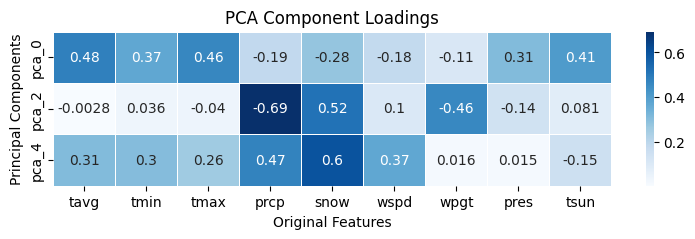

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from src.models.instrumental_variable import get_coefficients
from src.models.time_series import get_lagged_df

loadings_df = get_lagged_df(
    "media_combined_protest",
    instruments="pc_weather_season_trend",
    lags=range(-7, 1),
    step=1,
    cumulative=True,
    ignore_group=True,
    ignore_medium=True,
    region_dummies=True,
    return_loadings=True,
)
display(loadings_df)
plt.figure(figsize=(9, 2))
loadings = loadings_df.iloc[[0, 2, 4]]
loadings.columns = loadings.columns.str.replace("weather_", "").str.replace("_lag0", "")
sns.heatmap(loadings.abs(), annot=loadings, cmap="Blues", linewidths=0.5)
plt.title("PCA Component Loadings")
plt.ylabel("Principal Components")
plt.xlabel("Original Features")
plt.show()

  0%|          | 0/56 [00:00<?, ?it/s]

<Axes: xlabel='Day of outcome', ylabel='ATT estimate (#articles)'>

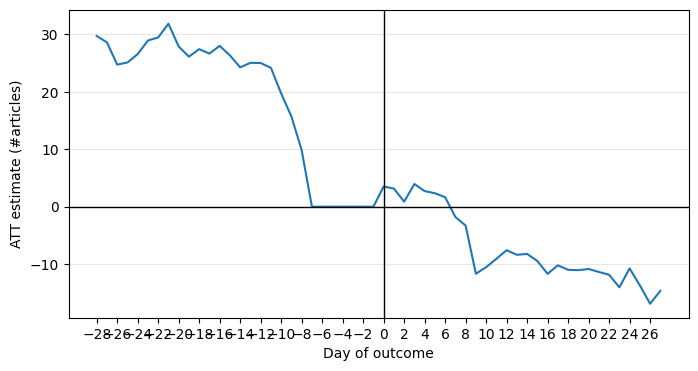

In [ ]:
from src.models.time_series import instrumental_variable_liml
from src.visualization.impacts import plot_impact_ts

results = instrumental_variable_liml(
    target="media_combined_protest",
    treatment="occ_protest",
    instruments="pc_weather",
    instruments_=["pca_0", "pca_2"],
    lags=range(-7, 1),
    ignore_group=True,
    ignore_medium=True,
    steps=range(-28, 28),
    n_jobs=1,
)
# display(results)
plot_impact_ts(results, "occ_protest", "media_combined_protest", ci=False)

<Axes: >

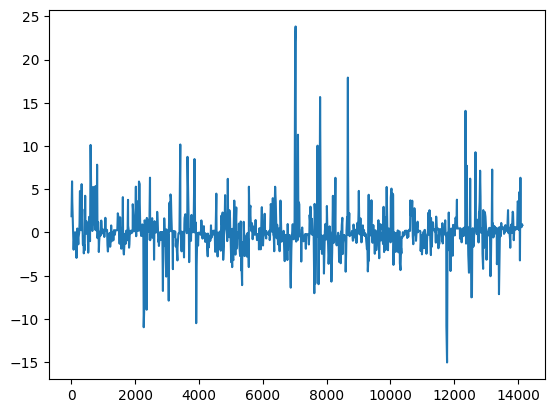

In [ ]:
from src.models.time_series import get_lagged_df

df = get_lagged_df(
    "media_combined_protest",
    instruments="weather_season_resid",
    lags=range(-7, 1),
    step=1,
    cumulative=True,
    ignore_group=True,
    ignore_medium=True,
    region_dummies=True,
)
list(df.columns)
df.query("region_Berlin_lag0 == 1")["weather_prcp_lag0"].plot()
# from statsmodels.tsa.seasonal import seasonal_decompose
# seasonal_decompose(df["weather_tavg_lag0"], model="additive", period=14*365, extrapolate_trend="freq").plot()

  0%|          | 0/14 [00:00<?, ?it/s]

<Axes: xlabel='Day of outcome', ylabel='ATT estimate (#articles)'>

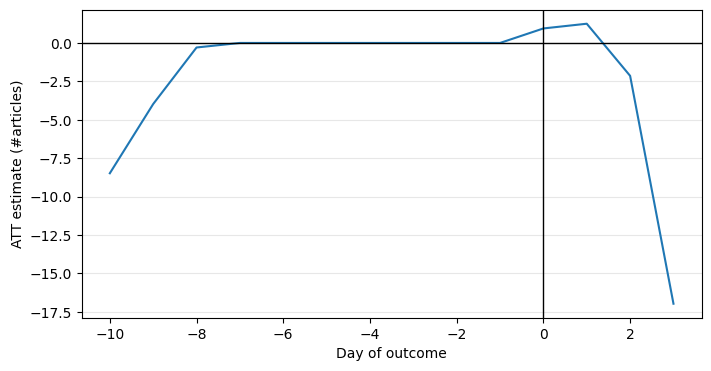

In [ ]:
from src.models.time_series import instrumental_variable_liml
from src.visualization.impacts import plot_impact_ts

results = instrumental_variable_liml(
    target="media_combined_protest",
    treatment="occ_protest",
    instruments="pc_weather_deseasoned",
    instruments_=["pca_0", "pca_2"],
    lags=range(-7, 1),
    ignore_group=True,
    ignore_medium=True,
    steps=range(-10, 4),
    n_jobs=1,
)
# display(results)
plot_impact_ts(results, "occ_protest", "media_combined_protest", ci=False)

In [ ]:
get_coefficients("covid_")

single               combi          
                                      coef      pval      coef      pval
covid_residential_lag0           -0.008873  0.000113 -0.001914  0.891142
covid_workplaces_lag0             0.007921  0.001786  0.017407  0.027851
covid_parks_lag0                  0.007308  0.000474  0.013324  0.007293
covid_transit_stations_lag0       0.006966  0.002402 -0.002504  0.828067
covid_retail_and_recreation_lag0  0.005872  0.008573 -0.004506  0.606562
covid_stringency_index_lag0      -0.002257  0.310158 -0.001097  0.853410
covid_grocery_and_pharmacy_lag0   0.001514  0.535521 -0.013697  0.013419

In [ ]:
from src.models.instrumental_variable import get_rf_params

rf1, rf2 = get_rf_params()
print(rf1, rf2)
print(rf1 == rf2)

{'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200} {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
True


In [ ]:
from src.models.instrumental_variable import check_for_improvement

results = check_for_improvement("weather_")
for clf, (a, b, p) in results.items():
    print(
        f"{clf}: {a.mean():.3f} ± {a.std():.3f} vs {b.mean():.3f} ± {b.std():.3f} -- t-test p={p:.3f}"
    )

LogisticRegression: 0.201 ± 0.057 vs 0.195 ± 0.057 -- t-test p=0.880
RandomForestClassifier: 0.219 ± 0.073 vs 0.213 ± 0.081 -- t-test p=0.761


In [ ]:
results = check_for_improvement("covid_")
for clf, (a, b, p) in results.items():
    print(
        f"{clf}: {a.mean():.3f} ± {a.std():.3f} vs {b.mean():.3f} ± {b.std():.3f} -- t-test p={p:.3f}"
    )

LogisticRegression: 0.201 ± 0.057 vs 0.196 ± 0.058 -- t-test p=0.770
RandomForestClassifier: 0.221 ± 0.073 vs 0.189 ± 0.114 -- t-test p=0.973


  0%|          | 0/28 [00:00<?, ?it/s]

<Axes: xlabel='Shift (days)', ylabel='Coefficient'>

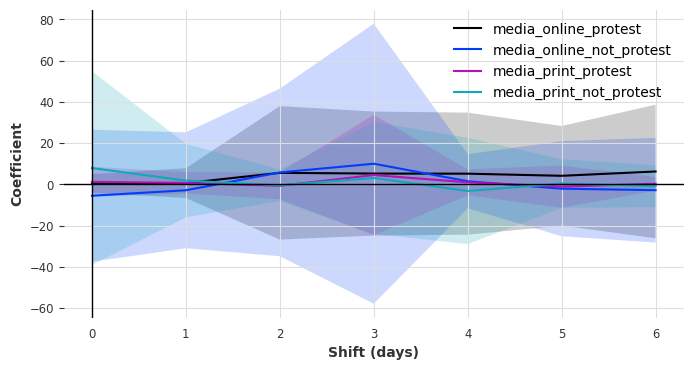

In [ ]:
from src.models.time_series import instrumental_variable_liml, plot_impact_ts

_, results = instrumental_variable_liml(
    target="protest",
    treatment="occ_protest",
    instruments=["weather_prcp"],
    lags=range(-7, 1),
    ignore_group=True,
    n_jobs=1,
)
results
plot_impact_ts(results, "occ_protest")

  0%|          | 0/28 [00:00<?, ?it/s]

<Axes: xlabel='Shift (days)', ylabel='Coefficient'>

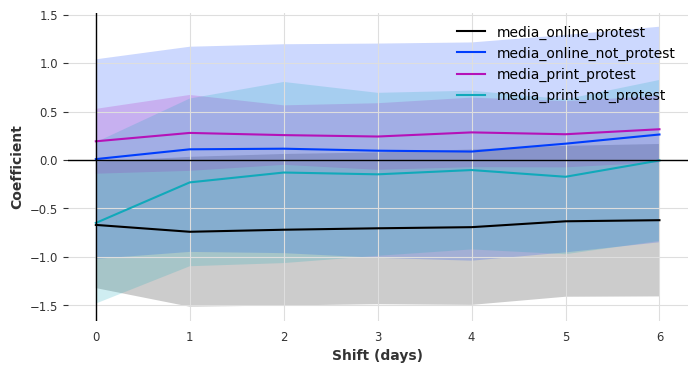

In [ ]:
from src.models.time_series import instrumental_variable_liml, plot_impact_ts

_, results = instrumental_variable_liml(
    target="protest",
    treatment="occ_protest",
    instrument="covid_residential",
    lags=range(-7, 1),
    ignore_group=True,
    n_jobs=1,
)
results
plot_impact_ts(results, "occ_protest")

  0%|          | 0/28 [00:00<?, ?it/s]

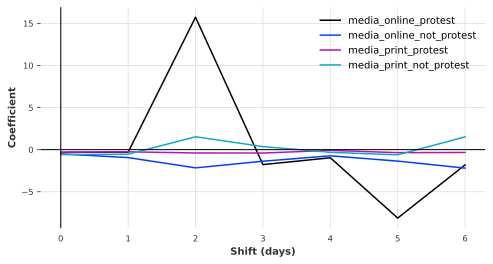

,coef,predictor,ci_lower,ci_upper,sargan,lag,step,target
0,-0.318449,occ_protest,-0.924280,0.287381,0.382231,0,0,media_online_protest
1,-0.300188,occ_protest,-1.680253,1.079877,0.065085,0,1,media_online_protest
2,15.732609,occ_protest,-13281.159234,13312.624453,0.008018,0,2,media_online_protest
3,-1.776222,occ_protest,-12.444097,8.891654,0.016109,0,3,media_online_protest
4,-0.962370,occ_protest,-3.687390,1.762651,0.049779,0,4,media_online_protest
5,-8.128474,occ_protest,-293.253751,276.996803,0.011376,0,5,media_online_protest
6,-1.808921,occ_protest,-6.403043,2.785200,0.052274,0,6,media_online_protest
7,-0.503122,occ_protest,-1.596435,0.590191,0.637404,0,0,media_online_not_protest
8,-0.943247,occ_protest,-4.413367,2.526872,0.037655,0,1,media_online_not_protest
9,-2.164674,occ_protest,-11.805192,7.475845,0.020752,0,2,media_online_not_protest


In [ ]:
from src.models.time_series import instrumental_variable_liml, plot_impact_ts

_, results = instrumental_variable_liml(
    target="protest",
    treatment="occ_protest",
    instruments=[
        "weather_prcp",
        "weather_tavg",
        "weather_tmin",
        "weather_tmax",
        "weather_snow",
        "weather_tsun",
        "weather_wspd",
        "weather_wpgt",
        "weather_pres",
    ],
    lags=range(-7, 1),
    ignore_group=True,
    binarize=True,
    n_jobs=1,
)
plot_impact_ts(results, "occ_protest", ci=False)
plt.show()
results

Sargan-Hansen test:

H0: The instruments are valid, that is they are uncorrelated with the error term of the structural equation.
See: InstrumentalVariablesEstimation2023, sheppardBashtageLinearmodelsRelease2023

In [ ]:
# season-independent params

In [ ]:
# TODO: validation
# res.wooldridge_regression
# res.wooldridge_overid
# res.sargan